# Synthetical trips and the delay due to late arrival

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from reliability import *

In [2]:
import os
cwd = os.getcwd()

In [3]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json
from scipy.stats import *

import pprint

In [5]:
colors = sns.color_palette("muted")

In [6]:
params = ExMAS.utils.get_config('spinoffs/late_arrival/config.json') # load the default 
sp = params.shareability 

# Synthetic example
----
lets have one ride of 5km shared with 1 to 7 other travellers


In [7]:
D = 8
requests = pd.DataFrame(index = list(range(1,D+2)))
requests['dist'] = 5000
requests['ttrav'] = 480
requests['ttrav_sh'] = 600
requests['u'] = 5.520
requests['u_sh'] = 9.18
requests['index'] = requests.index
requests['treq'] = 100*(requests.index-1)
requests

,dist,ttrav,ttrav_sh,u,u_sh,index,treq
1,5000,480,600,5.520,9.180,1,0
2,5000,480,600,5.520,9.180,2,100
3,5000,480,600,5.520,9.180,3,200
4,5000,480,600,5.520,9.180,4,300
5,5000,480,600,5.520,9.180,5,400
6,5000,480,600,5.520,9.180,6,500
7,5000,480,600,5.520,9.180,7,600
8,5000,480,600,5.520,9.180,8,700
9,5000,480,600,5.520,9.180,9,800


In [8]:
t_sh = requests.loc[1].ttrav_sh
r = pd.DataFrame(index = list(range(1,D+1)))
r['indexes'] = [list(range(1,i)) for i in range(3,D+3)]
r['degree'] = list(range(2,D+2))
r['indexes_orig'] = r.indexes
r['indexes_dest'] = r.indexes
r['u_pax'] = requests.loc[1].u_sh * r.degree
r['PassHourTrav_ns'] = requests.loc[1].ttrav * r.degree
r['u_veh'] = r.apply(lambda x: int(requests.loc[1].ttrav_sh * x.degree * math.exp(-x.degree/10)), axis = 1)
r['lambda_r'] = r['u_veh']/(r.degree*t_sh)
r['u_pax'] = r.apply(lambda x: x.degree * [requests.loc[1].u_sh], axis = 1)
r['times'] = r.apply(lambda x: [0] + [100 for i in range(x.degree-1)] + [t_sh-100*(x.degree-1)]+ [100 for i in range(x.degree-1)] , axis = 1)

schedule = r
schedule

,indexes,degree,indexes_orig,indexes_dest,u_pax,PassHourTrav_ns,u_veh,lambda_r,times
1,"[1, 2]",2,"[1, 2]","[1, 2]","[9.18, 9.18]",960.000,982,0.818,"[0, 100, 500.0, 100]"
2,"[1, 2, 3]",3,"[1, 2, 3]","[1, 2, 3]","[9.18, 9.18, 9.18]",1440.000,1333,0.741,"[0, 100, 100, 400.0, 100, 100]"
3,"[1, 2, 3, 4]",4,"[1, 2, 3, 4]","[1, 2, 3, 4]","[9.18, 9.18, 9.18, 9.18]",1920.000,1608,0.670,"[0, 100, 100, 100, 300.0, 100, 100, 100]"
4,"[1, 2, 3, 4, 5]",5,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]","[9.18, 9.18, 9.18, 9.18, 9.18]",2400.000,1819,0.606,"[0, 100, 100, 100, 100, 200.0, 100, 100, 100, ..."
5,"[1, 2, 3, 4, 5, 6]",6,"[1, 2, 3, 4, 5, 6]","[1, 2, 3, 4, 5, 6]","[9.18, 9.18, 9.18, 9.18, 9.18, 9.18]",2880.000,1975,0.549,"[0, 100, 100, 100, 100, 100, 100.0, 100, 100, ..."
6,"[1, 2, 3, 4, 5, 6, 7]",7,"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]","[9.18, 9.18, 9.18, 9.18, 9.18, 9.18, 9.18]",3360.000,2085,0.496,"[0, 100, 100, 100, 100, 100, 100, 0.0, 100, 10..."
7,"[1, 2, 3, 4, 5, 6, 7, 8]",8,"[1, 2, 3, 4, 5, 6, 7, 8]","[1, 2, 3, 4, 5, 6, 7, 8]","[9.18, 9.18, 9.18, 9.18, 9.18, 9.18, 9.18, 9.18]",3840.000,2156,0.449,"[0, 100, 100, 100, 100, 100, 100, 100, -100.0,..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",9,"[1, 2, 3, 4, 5, 6, 7, 8, 9]","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[9.18, 9.18, 9.18, 9.18, 9.18, 9.18, 9.18, 9.1...",4320.000,2195,0.406,"[0, 100, 100, 100, 100, 100, 100, 100, 100, -2..."


parameterizing distributions

In [9]:
sp.var = DotMap({'pax_arrival': 15, 'veh_arrival':0, 'travel_time':0})  #passengers arrive on average 17s late, with std of 15s.
sp.lognorm_s = 0.7
sp.punct_shift = 1.5
sp.max0 = True
sp.sample = 2000 # distribution parameters
sp.skew = -2
sp.quant = 0.9
sp.mu = -0.9
sp.saint_ones = list() # which paxes are not late
sp.shared_discount = 0.6

## Arrival distributions

### log-normal

In [10]:
sp.lognorm_s = 0.7

Arrival distribution (delay)
0.28 8.440783720833121


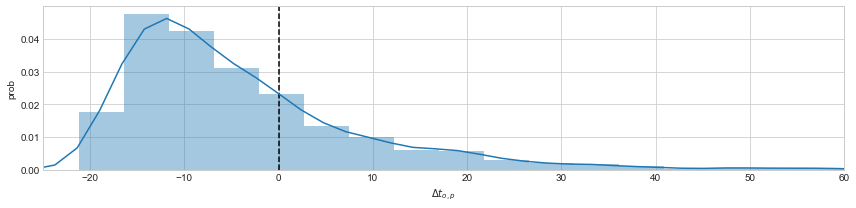

In [11]:
sp.max0 = False
plt.rcParams['figure.figsize'] = [12, 3]
plt.rcParams["font.family"] = "Times"
plt.style.use('seaborn-whitegrid')
loc = 2000
r = lognorm.rvs(s=sp.lognorm_s, loc=loc- sp.punct_shift *sp.var.pax_arrival,scale = sp.var.pax_arrival, size = sp.sample)
if sp.max0 == True:
    r = np.maximum(r,loc)
fig, ax = plt.subplots()
ax.axvline(loc-loc, color='black', linestyle='--', label = 'wait limit')
#fig.suptitle('Arrival distribution. Log-normal with mean {} scale {} and sigma {}, sampled {} times.'.format(-sp.var.pax_arrival, 
#                                                                                                              sp.var.pax_arrival, 
#                                                                                                              sp.lognorm_s,
#                                                                                                              sp.sample))

sns.distplot(r-loc, ax = ax, kde = True, bins = 60)
#ax.set_ylim(0,0.02500)
ax.set_xlim(-25,60)
ax.set_xlabel(r'$\Delta t_{o,p}$')
ax.set_ylabel(r'prob')
print('Arrival distribution (delay)')
print((pd.Series(r)-loc>0).sum()/sp.sample, (pd.Series(r)-loc).quantile(0.85))
(pd.Series(r)-loc).describe().to_frame().T
#df = pd.Series(r-loc).to_frame()
#df['zero']=0
#sns.distplot(df.max(axis=1),ax=ax)
fig.tight_layout()
plt.savefig('fig3.png')

* Mean delay is `18s` and its standard deviation is `15s` (parametrizable) 
* First one (of 1000 samples) arrives 15seconds before schedule departure, last one 80s after.
* Distribution is skewed normal, skewed to the right (`skew = 3`)


---- 
Let's us now see how pax arrival delay impacts shared ride and other sharing travellers. 

* arrival distribution is the same for all the travellers
* vehicle departs from pickup node after passenger has arrived
* dropoff process is deternimistic

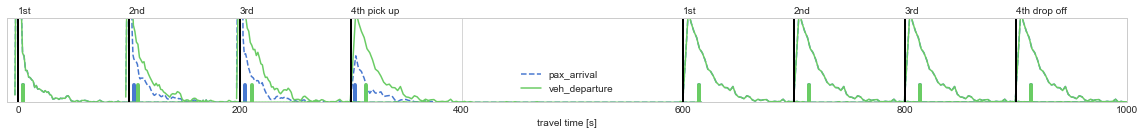

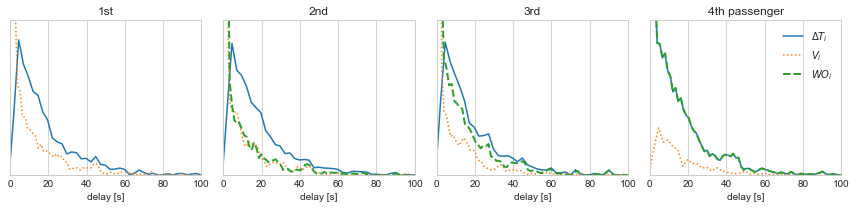

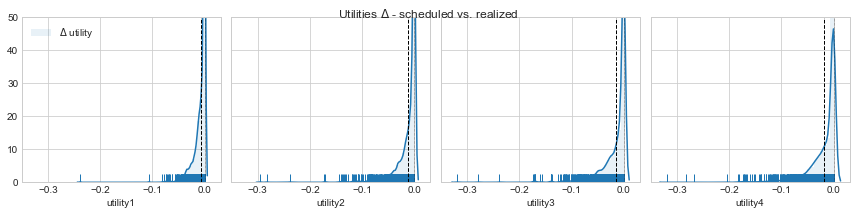

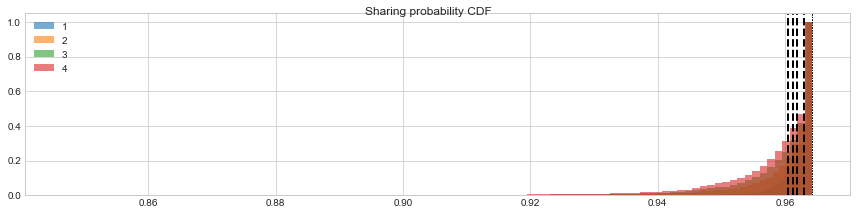

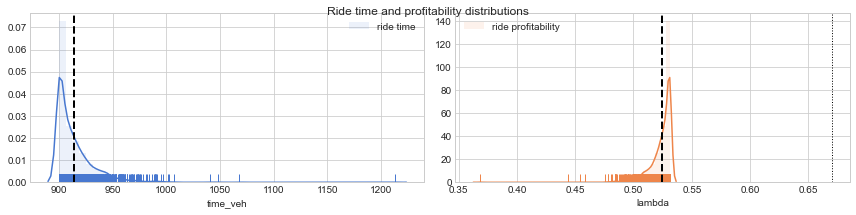

In [12]:
sp.max0 = True
simulated_ride = pipe(schedule, requests, sp, vis = True, id =3)

----
# 1a. Delay increases with number of sharing travellers

In [13]:
sp.var = DotMap({'pax_arrival': 15, 'veh_arrival':0, 'travel_time':0})  
#passengers arrive on average 17s late, with std of 15s.

ret = dict()
times = dict()
sp.sample = 2000
for i in schedule.index:
    simulated_ride = pipe(schedule, requests, sp, vis = False, id = i)
    ret[i]=(simulated_ride.requests[simulated_ride.requests.index==1].squeeze())
    times[i+1] = simulated_ride.samples.time_pax1

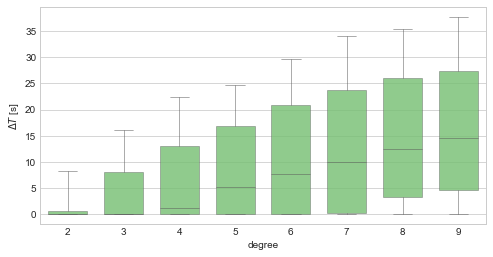

array([       nan, 0.95967727, 0.39326781, 0.10196409, 0.2022586 ,
       0.14932771, 0.03809292, 0.06538876])

In [14]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams["axes.grid"] = True
fig, ax = plt.subplots()
#ax3 = ax.twinx()
df = (pd.DataFrame(times)-600).stack().reset_index() 
df['degree'] = df['level_1']
df[r'$\Delta T$ [s]'] = df[0]
trend = pd.DataFrame((pd.DataFrame(times)-600).quantile(0.85)).pct_change().T

sns.boxplot(x = 'degree', y = r'$\Delta T$ [s]', data = df, showfliers = False, 
            width = 0.7,  linewidth = 0.5, color = colors[2], boxprops=dict(alpha=.8), whis = [15,85], ax = ax)
#ax3.plot(trend.values[0])
plt.savefig('fig6.png')

plt.show()
trend.values[0]

In [15]:
df = pd.DataFrame((pd.DataFrame(times)-600))
for col in df.columns:
    
    df[col] = df[col]/col
df.mean()/sp.var.pax_arrival

2   0.131
3   0.150
4   0.158
5   0.155
6   0.156
7   0.160
8   0.154
9   0.147
dtype: float64

For the same scheduled trip parmeters the average travel time increases with each additional traveller. If ride is shared with one traveller the mean delay is xs and it grows to xs for 8 travellers. 
85th percentile of delay grows from 4.5s for one additional passenger to 38s for 8 additional passengers.

# 1b. Changes with the pickup position of traveller 

In [16]:
ret = dict()
times = dict()
sp.sample = 500
simulated_ride = pipe(schedule, requests, sp, vis = False, id = 8)

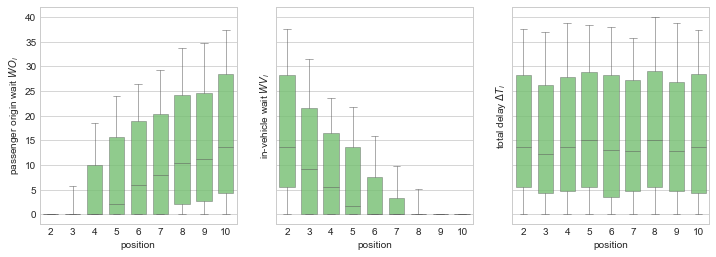

In [17]:
plt.rcParams['figure.figsize'] = [12, 4]
fig, axes = plt.subplots(1,3, sharey = True)
times= dict()
for i in simulated_ride.requests.index:
    times[i+1] = simulated_ride.samples['pax_wait_o'+str(i)]
df = (pd.DataFrame(times)).stack().reset_index() 
df['position'] = df['level_1']
df['passenger wait [s]'] = df[0]
sns.boxplot(x = 'position', y = 'passenger wait [s]', data = df, showfliers = False, 
            width = 0.7,  linewidth = 0.5, color = colors[2], boxprops=dict(alpha=.8), whis = [0,85], ax = axes[0])


# times= dict()
# for i in simulated_ride.requests.index:
#     times[i+1] = simulated_ride.samples['veh_wait_o'+str(i)]
# df = (pd.DataFrame(times)).stack().reset_index() 
# df['position'] = df['level_1']
# df['vehicle wait [s]'] = df[0]
# sns.boxplot(x = 'position', y = 'vehicle wait [s]', data = df, showfliers = False, 
#             width = 0.7,  linewidth = 0.5, color = colors[2], boxprops=dict(alpha=.3), whis = [0,85], ax = axes[1])


times= dict()
for i in simulated_ride.requests.index:
    times[i+1] = simulated_ride.samples['veh_arrival_d'+str(i)] - simulated_ride.samples['veh_departure_o'+str(i)]
df = (pd.DataFrame(times)-600).stack().reset_index() 
df['position'] = df['level_1']
df['ride time [s]'] = df[0]
sns.boxplot(x = 'position', y = 'ride time [s]', data = df, showfliers = False, 
            width = 0.7,  linewidth = 0.5, color = colors[2], boxprops=dict(alpha=.8), whis = [0,85], ax = axes[1])

times= dict()
for i in simulated_ride.requests.index:
    times[i+1] = simulated_ride.samples['time_pax'+str(i)]
df = (pd.DataFrame(times)-600).stack().reset_index() 
df['position'] = df['level_1']
df['travel time [s]'] = df[0]
sns.boxplot(x = 'position', y = 'travel time [s]', data = df, showfliers = False, width = 0.7,  
            linewidth = 0.5, color = colors[2], boxprops=dict(alpha=.8), whis = [0,85], ax = axes[-1])
axes[0].set_ylabel(r'passenger origin wait $WO_i}$')
#axes[1].set_ylabel(r'vehicle origin wait $(P_i-O_i)_-$')
axes[1].set_ylabel(r'in-vehicle wait $WV_i$')
axes[2].set_ylabel(r'total delay $\Delta T_i$')

plt.savefig('fig7.png')
plt.show()

In [18]:
df

,sample,level_1,0,position,travel time [s]
0,0,2,13.605,2,13.605
1,0,3,13.605,3,13.605
2,0,4,13.605,4,13.605
3,0,5,13.605,5,13.605
4,0,6,0.000,6,0.000
...,...,...,...,...,...
4495,499,6,8.674,6,8.674
4496,499,7,8.674,7,8.674
4497,499,8,8.674,8,8.674
4498,499,9,8.674,9,8.674


## 1c. Changes due to varying lateness

In [19]:
ret = list()
sp.sample = 2000
for var in range(1,60):
    sp.var.pax_arrival = var
    for i in schedule.index:
        simulated_ride = pipe(schedule, requests, sp, vis = False, id = i)    
        ret.append([var,i+1,simulated_ride.requests.loc[1].mean_time])

In [21]:
plt.rcParams['figure.figsize'] = [10, 4]

df = pd.DataFrame(ret)
df.columns = ['variability', 'degree', 'y']
df.y = df.y - 600
slopes = list()
for d in [2,3,4,5,6,7,8,9]:
    x = df[df.degree == d].variability
    y = df[df.degree == d].y
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes.append('{} | {:.2f}'.format(d,slope))
slopes

['2 | 0.24',
 '3 | 0.46',
 '4 | 0.65',
 '5 | 0.82',
 '6 | 0.96',
 '7 | 1.10',
 '8 | 1.22',
 '9 | 1.34']

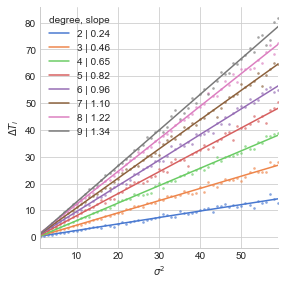

In [22]:
lm = sns.lmplot(x = 'variability', y ='y', hue = 'degree', data = df, scatter_kws={"s": 3, "alpha": 0.5}, line_kws={"lw":1.5, "alpha": 1}, 
           ci = 0.99, palette= colors, size=4, aspect=1, legend = False)
ax = lm.axes
ax[0][0].set_ylabel(r'$\Delta T_i$')
ax[0][0].set_xlabel(r'$\sigma^2$')
ax[0][0].legend(slopes, title = 'degree, slope')
lm.savefig("fig8.png")

Obviously travelerrs delay grows with the distribution of passenger arrival process, notably it affects more the rides of higher degree. If ride is share by two travellers, mean delay is for variability of 20s is 10s and it grows to 30s for higher degree. If variability is low, shared rides of higer degree remain within acceptable delay, yet if the process becomes more random higher degree rides sacrifice more.

# 2. from all punctual to all late
----


In [24]:
sp.var = DotMap({'pax_arrival': 15, 'veh_arrival':0, 'travel_time':0})  #passengers arrive on average 17s late, with std of 15s.
sp.punct_shift = 1.5
sp.samples = 2000
puncts = dict()
lates = dict()
veh_puncts = dict()
veh_lates = dict()
dels_puncts = dict()
dels_lates = dict()
ride_id = 4
saint_scenarios = { '0': [1,2,3,4,5],
                   '11':[1,2,3,4],
                   '12':[1,2,3,5],
                   '13':[1,2,4,5],
                   '14':[2,3,4,5],
                   '21': [2,3,4],
                   '22': [2,3,5],
                   '23': [1,2,3],
                   '24': [1,2,4],
                   '31' : [1,2],
                   '32' : [2,3],
                   '33' : [2,4],
                   '34' : [2,5],
                   '40' : [2]
                  }

for key in saint_scenarios:
    sc = saint_scenarios[key]
    sp.saint_ones = sc
    df = pipe(schedule, requests, sp, vis = False, id = ride_id).samples
    
    puncts[key] = df['veh_arrival_d2']
    veh_puncts[key] = df['time_veh']
    dels_puncts[key] = df['time_pax2']
    sc.remove(2)
    sp.saint_ones = sc
    df = pipe(schedule, requests, sp, vis = False, id = ride_id).samples
    lates[key] = df['veh_arrival_d2']
    veh_lates[key] = df['time_veh']
    dels_lates[key] = df['time_pax2']

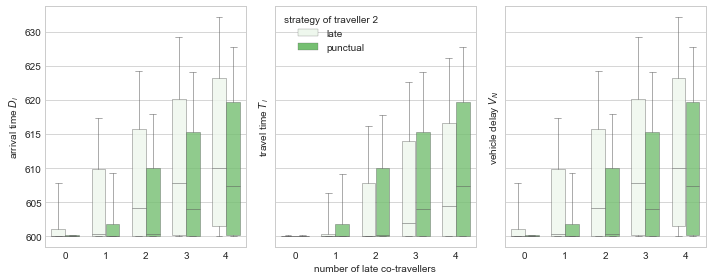

In [25]:
def single_plot(ax,df1,df2,shift = 600):
    punct = pd.DataFrame(df1)-int(shift)
    late = pd.DataFrame(df2)-int(shift)
    late = (pd.DataFrame(late)).stack().reset_index()
    
    late['punctual']='punctual'
    late['scenario'] = late['level_1']
    late['passenger delay [s]'] = late[0]
    punct = (pd.DataFrame(punct)).stack().reset_index()
    punct['punctual']='late'
    punct['scenario'] = punct['level_1']
    punct['passenger delay [s]'] = punct[0]
    df = pd.concat([punct, late])
    df['scenario'] = df['level_1']
    df['passenger delay [s]'] = df[0]
    df['scen']=df.scenario.astype(int).apply(lambda x: divmod(x,10)[0])
    df = df[['punctual','scen','passenger delay [s]']]
    plt.rcParams['figure.figsize'] = [8, 4]
    sns.boxplot(x = 'scen', y = 'passenger delay [s]', 
                hue = 'punctual', data = df, showfliers = False, 
                width = 0.7,  linewidth = 0.5, color = colors[2], boxprops=dict(alpha=.8), whis = [0,85], ax = ax)
    
plt.rcParams['figure.figsize'] = [10, 4]
fig, ax = plt.subplots(1,3, sharey = True)
single_plot(ax[0],lates,puncts,100)
single_plot(ax[1],dels_lates,dels_puncts,0)
single_plot(ax[2],veh_lates,veh_puncts,400)
ax[0].get_legend().remove()
ax[1].legend(title="strategy of traveller 2")
ax[2].get_legend().remove()
ax[0].set_ylabel('arrival time $D_i$')
ax[1].set_ylabel('travel time $T_i$')
ax[2].set_ylabel('vehicle delay $V_N$')
ax[0].set_xlabel('')
ax[1].set_xlabel('number of late co-travellers')
ax[2].set_xlabel('')
plt.tight_layout() 
fig.savefig('fig9.png')
plt.show()

---